# <span style='background:black'><span style='color:Cyan'> <span style='font-family:"Times New Roman"'> Copyright statement: 
#### <span style='font-family:"Times New Roman"'>The minisom package is developed by : https://github.com/JustGlowing/minisom 
#### <span style='font-family:"Times New Roman"'>The algorithm in current form is developed by Sina Zamen. 

# <span style='background:black'><span style='color:Cyan'> <span style='font-family:"Times New Roman"'> Objective: 
## <span style='font-family:"Times New Roman"'>In this project Contextual map using SOM for provided dataset is generated. Then queries from some features are taken to show the accuracy of classification for provided map. 

### <span style='font-family:"Times New Roman"'>Loading Required Modules:

In [1]:
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
from minisom import MiniSom
import numpy as np
%matplotlib inline

In [2]:
animal = ['Dove','Hen','Duck','Goose','Owl','Hawk','Eagle','Fox','Dog','Wolf','Cat',
          'Tiger','Lion','Horse','Zebra','Cow','Bear']
attribute = np.array([[1,0,0,1,0,0,0,0,1,0,0,1,0],
                      [1,0,0,1,0,0,0,0,1,0,0,0,0],
                      [1,0,0,1,0,0,0,0,1,0,0,0,1],
                      [1,0,0,1,0,0,0,0,1,0,0,1,1],
                      [0,1,0,1,0,0,0,0,1,1,0,1,0],
                      [1,0,0,1,0,0,0,0,1,1,0,1,0],
                      [0,1,0,1,0,0,0,0,1,1,0,1,0],
                      [0,1,0,0,1,1,0,0,0,1,0,0,0],
                      [0,1,0,0,1,1,0,0,0,0,1,0,0],
                      [0,1,0,0,1,1,0,1,0,1,1,0,0],
                      [1,0,0,0,1,1,0,0,0,1,0,0,0],
                      [0,0,1,0,1,1,0,0,0,1,1,0,0],
                      [0,0,1,0,1,1,0,1,0,1,1,0,0],
                      [0,0,1,0,1,1,1,1,0,0,1,0,0],
                      [0,0,1,0,1,1,1,1,0,0,1,0,0],
                      [0,0,1,0,1,1,1,0,0,0,0,0,0],
                      [0,0,1,0,1,1,0,0,0,1,1,0,1]])
feature_names = ['Small', 'Medium', 'Large',
                 '2 Legs', '4 Legs', 'Hair','Hooves','Mane','Feathers','Hunt','Run','Fly','Swim']

In [3]:
# Initialization and training
som = MiniSom(7, 7, 13, sigma=3, learning_rate=0.1, 
              neighborhood_function='triangle')

som.pca_weights_init(attribute)
print("Training...")
som.train_batch(attribute, 1000, verbose=True)  # random training
print("\n...ready!")

Training...


 [  607 / 1000 ]  61% - 0:00:00 left 

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.05147848186623099
 topographic error: 0.9411764705882353

...ready!


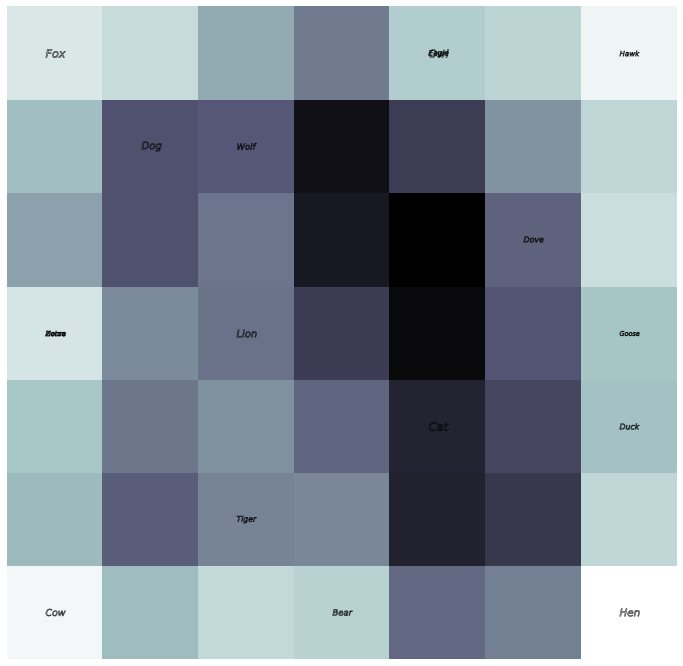

In [4]:
plt.figure(figsize=(12,12))
fig1 = plt.figure(1)
ax = fig1.gca()
# Plotting the response for each pattern in the iris dataset
ax = plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
#plt.colorbar()

t = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])


# use different colors and markers for each label
markers = ["$Dove$","$Hen$","$Duck$","$Goose$","$Owl$","$Hawk$","$Eagle$","$Fox$","$Dog$","$Wolf$","$Cat$","$Tiger$","$Lion$","$Horse$","$Zebra$","$Cow$","$Bear$"]
colors = ['k']


for cnt, xx in enumerate(attribute):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    ax = plt.plot(w[0]+.5, w[1]+.5, marker=markers[t[cnt]], markerfacecolor='None',
             markeredgecolor=colors[0], markersize=20, markeredgewidth=0.5)
plt.axis([0, 7, 0, 7])
plt.axis('off')
plt.show()

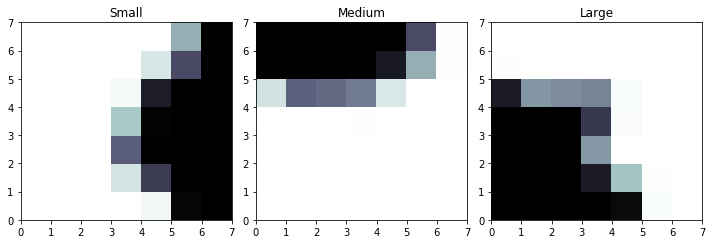

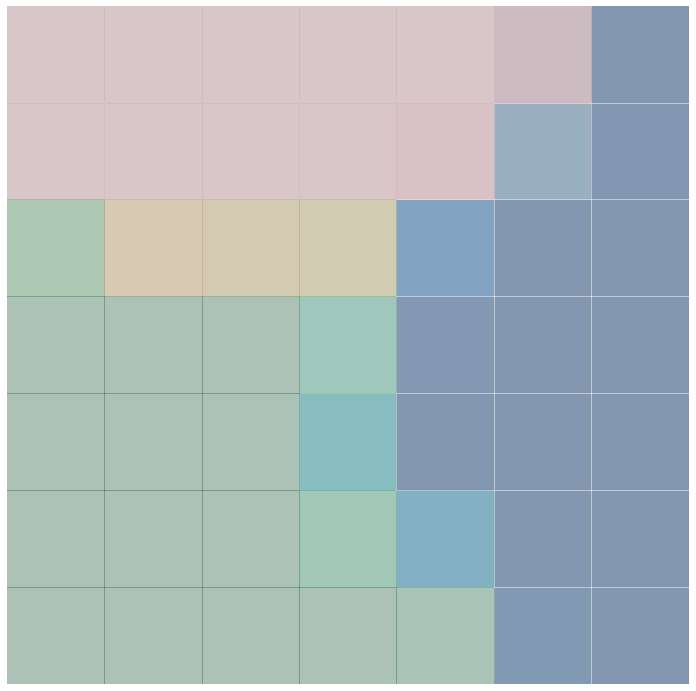

In [5]:
W = som.get_weights()
plt.figure(figsize=(10, 3.5))
plt.subplot(1, 3, 1)
plt.title('Small')
plt.pcolor(W[:,:,0].T, cmap='bone_r')
plt.subplot(1, 3, 2)
plt.title('Medium')
plt.pcolor(W[:,:,1].T, cmap='bone_r')
plt.subplot(1, 3, 3)
plt.title('Large')
plt.pcolor(W[:,:,2].T, cmap='bone_r')

plt.xticks(np.arange(7+1))
plt.yticks(np.arange(7+1))
plt.tight_layout()
plt.show()
N = 8
x = np.arange(0, N)
y = np.arange(0, N)

X, Y = np.meshgrid(x, y)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
plt.pcolormesh(X, Y, W[:,:,0].T, cmap=plt.cm.Blues)
plt.pcolormesh(X, Y, W[:,:,1].T, cmap=plt.cm.Reds, alpha=0.3)
plt.pcolormesh(X, Y, W[:,:,2].T, cmap=plt.cm.Greens, alpha=0.3)

plt.xticks(np.arange(N))
plt.yticks(np.arange(N))
plt.tight_layout()
plt.axis('off')
plt.show()

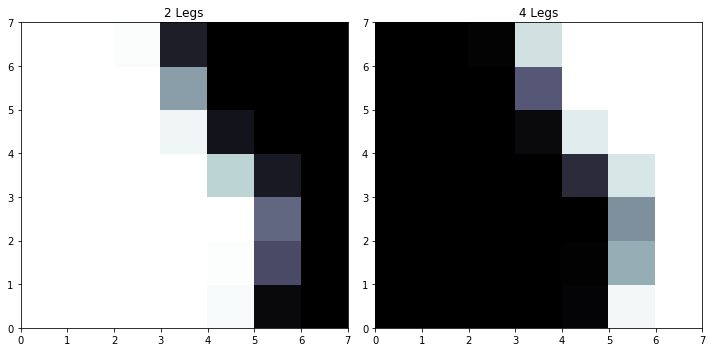

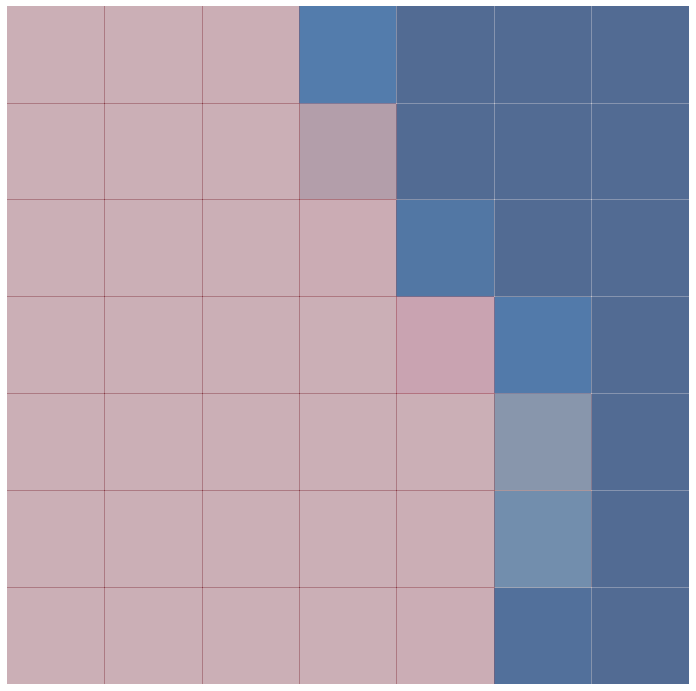

In [6]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('2 Legs')
plt.pcolor(W[:,:,3].T, cmap='bone_r')
plt.subplot(1, 2, 2)
plt.title('4 Legs')
plt.pcolor(W[:,:,4].T, cmap='bone_r')


plt.xticks(np.arange(7+1))
plt.yticks(np.arange(7+1))
plt.tight_layout()
plt.show()
N = 8
x = np.arange(0, N)
y = np.arange(0, N)

X, Y = np.meshgrid(x, y)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
plt.pcolormesh(X, Y, W[:,:,3].T, cmap=plt.cm.Blues)
plt.pcolormesh(X, Y, W[:,:,4].T, cmap=plt.cm.Reds, alpha=0.3)

plt.xticks(np.arange(N))
plt.yticks(np.arange(N))
plt.tight_layout()
plt.axis('off')
plt.show()

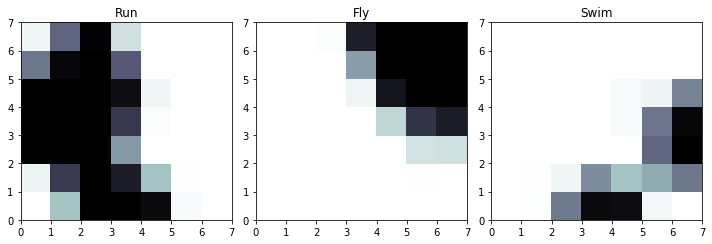

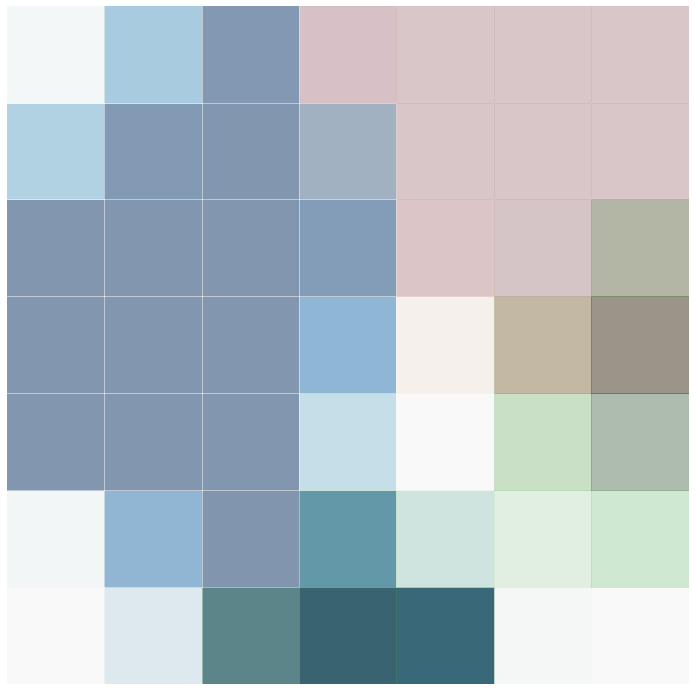

In [7]:
plt.figure(figsize=(10, 3.5))
plt.subplot(1, 3, 1)
plt.title('Run')
plt.pcolor(W[:,:,10].T, cmap='bone_r')
plt.subplot(1, 3, 2)
plt.title('Fly')
plt.pcolor(W[:,:,11].T, cmap='bone_r')
plt.subplot(1, 3, 3)
plt.title('Swim')
plt.pcolor(W[:,:,12].T, cmap='bone_r')

plt.xticks(np.arange(7+1))
plt.yticks(np.arange(7+1))
plt.tight_layout()
plt.show()
N = 8
x = np.arange(0, N)
y = np.arange(0, N)

X, Y = np.meshgrid(x, y)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
plt.pcolormesh(X, Y, W[:,:,10].T, cmap=plt.cm.Blues)
plt.pcolormesh(X, Y, W[:,:,11].T, cmap=plt.cm.Reds, alpha=0.3)
plt.pcolormesh(X, Y, W[:,:,12].T, cmap=plt.cm.Greens, alpha=0.3)

plt.xticks(np.arange(N))
plt.yticks(np.arange(N))
plt.tight_layout()
plt.axis('off')
plt.show()